**pandas to read data , numpy to convert our data into a format suitable to feed our classification , seaborn and matplotlib for visualizations , sklearn for SVM**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [52]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1N-sApw6cV2wTZxW8YcsgoHJmOAgD44G9' -O winequality.csv 

/bin/bash: wget --no-check-certificate https://docs.google.com/uc?export=download&id=1N-sApw6cV2wTZxW8YcsgoHJmOAgD44G9 -O winequality.csv: No such file or directory


**IMPORTING DATASET**

In [53]:
df=pd.read_csv('https://docs.google.com/uc?export=download&id=1N-sApw6cV2wTZxW8YcsgoHJmOAgD44G9')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


**EXPLORATORY DATA ANALYSIS**

In [54]:
df.shape

(4898, 12)

**CHECKING OUT FOR MISSING VALUES**

In [57]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**visualization**

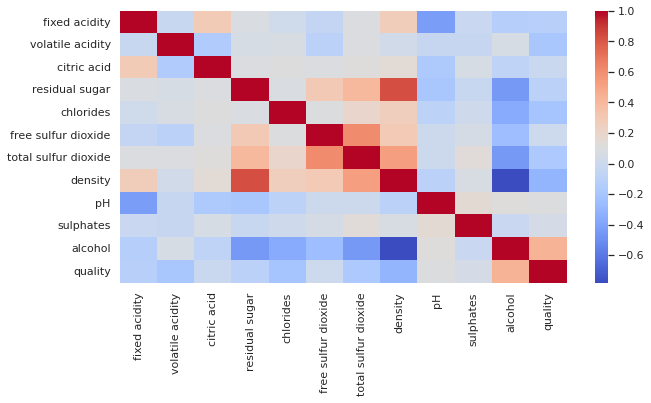

In [58]:
# correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

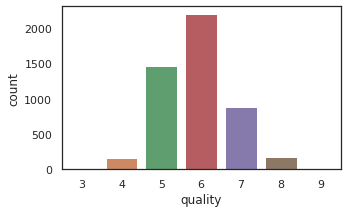

In [59]:
#ploting countplot quality 
plt.figure(figsize=(5,3))
sns.countplot(x='quality',data=df)

**TRAINING MODEL**

In [24]:
# Split between features and label
y = df['quality'].values
X = df.drop(axis=1, labels=['quality'])

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [29]:
# Test and training validation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2456, stratify=y)

In [30]:
from sklearn.svm import SVC

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
c = [0.001, 0.01, 0.1, 1, 2, 5, 10, 20,25]
k = ['linear', 'poly', 'rbf']
df=[]
for i in c:
  for j in k: 
    clf=SVC(C=i,kernel =j,random_state=1060)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    a=accuracy_score(y_test,y_pred)
    m = confusion_matrix(y_test, y_pred)
    train_accuracy = clf.score(x_train,y_train)
    test_accuracy = clf.score(x_test,y_test)
    print("train_accuracy:",train_accuracy)
    print("test_accuracy: ", test_accuracy)

    print("accuracy=",a)
    print("confusion matrix=",m)
    print("=================================================================")
    df.append((i,j,test_accuracy,test_accuracy))

cols=['i','k','train_accuracy','test_accuracy']
result = pd.DataFrame(df, columns=cols)

train_accuracy: 0.46248085758039814
test_accuracy:  0.46530612244897956
accuracy= 0.46530612244897956
confusion matrix= [[  0   0   1   3   0   0   0]
 [  0   0   9  24   0   0   0]
 [  0   0  24 267   0   0   0]
 [  0   0   8 432   0   0   0]
 [  0   0   1 175   0   0   0]
 [  0   0   0  35   0   0   0]
 [  0   0   0   1   0   0   0]]
train_accuracy: 0.450229709035222
test_accuracy:  0.4479591836734694
accuracy= 0.4479591836734694
confusion matrix= [[  0   0   0   4   0   0   0]
 [  0   0   0  33   0   0   0]
 [  0   0   0 291   0   0   0]
 [  0   0   1 439   0   0   0]
 [  0   0   0 176   0   0   0]
 [  0   0   0  35   0   0   0]
 [  0   0   0   1   0   0   0]]
train_accuracy: 0.44869831546707506
test_accuracy:  0.4489795918367347
accuracy= 0.4489795918367347
confusion matrix= [[  0   0   0   4   0   0   0]
 [  0   0   0  33   0   0   0]
 [  0   0   0 291   0   0   0]
 [  0   0   0 440   0   0   0]
 [  0   0   0 176   0   0   0]
 [  0   0   0  35   0   0   0]
 [  0   0   0   1   0   

In [41]:
print("Best Train: ", clf.score(x_train, y_train))
print("Best Test:  ", clf.score(x_test, y_test))

Best Train:  0.781010719754977
Best Test:   0.6112244897959184


In [42]:
result

,i,k,train_accuracy,test_accuracy
0,0.001,linear,0.465306,0.465306
1,0.001,poly,0.447959,0.447959
2,0.001,rbf,0.448980,0.448980
3,0.010,linear,0.523469,0.523469
4,0.010,poly,0.455102,0.455102
5,0.010,rbf,0.448980,0.448980
6,0.100,linear,0.525510,0.525510
7,0.100,poly,0.483673,0.483673
8,0.100,rbf,0.554082,0.554082
9,1.000,linear,0.527551,0.527551


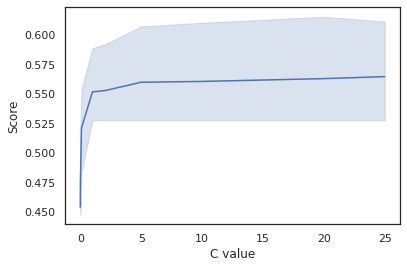

In [44]:
# Score versus C value
ax = sns.lineplot(x=result['i'] ,y=result['test_accuracy']);
ax.set(xlabel='C value', ylabel='Score')
plt.show()

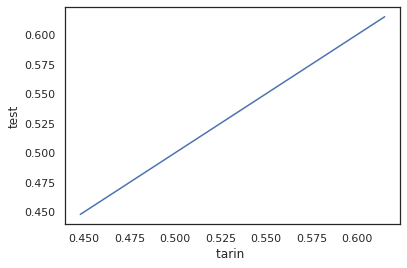

In [61]:
ax = sns.lineplot(x=result['test_accuracy'] ,y=result['train_accuracy']);
ax.set(xlabel='tarin ', ylabel='test')
plt.show()

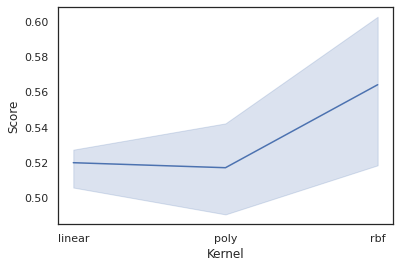

In [46]:
# Score vs selected kernel
ax = sns.lineplot(x=result['k'] ,y=result['test_accuracy']);
ax.set(xlabel='Kernel', ylabel='Score')
plt.show()

For varied values of C and kernal rbf and poly  We can observe that as the value of C is increasing the accuracy tends to get better.  This will lead to over fitting.
as c value gets increse  the error in training set is decreasing leading to increased accuracy of training set while the test accuracy keeps on decreasing.


**for the given dataset**
* Best Test accuracy:   0.6112244897959184
* Best Train accuracy:  0.781010719754977









fews things to observe


*   if c value>5 test acurracy is getting constant
*   more poly kernel the acurracy is high 



which means Data is not linearly separable